In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
languages = pd.read_csv('/content/1697822132309-Languages.csv',encoding='UTF-8-sig',sep=',')
languages.head()

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9


In [92]:
countries = ('MEX','USA','BLZ','GTM')

mexico_borders = languages.loc[(languages['CountryCode'].isin(countries))&(languages['Language']=='Spanish'),['CountryCode','Percentage']]
mexico_borders.set_index('CountryCode',inplace=True)
mexico_borders.head()

,Percentage
CountryCode,
BLZ,31.6
GTM,64.7
MEX,92.1
USA,7.5


Text(2, 92.1, '92.1%')

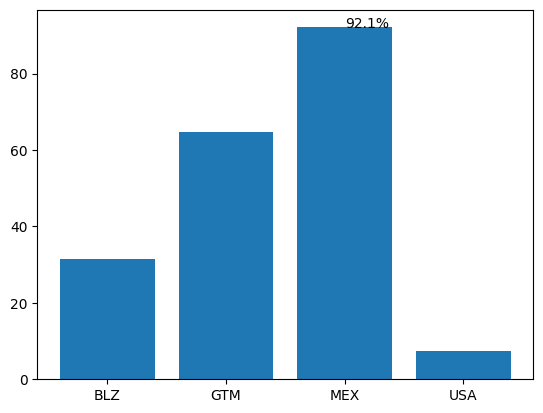

In [93]:
## crear grafica con y texto con matplotlib

plt.bar( mexico_borders.index,'Percentage',data=mexico_borders)
plt.text(2,92.1,'92.1%')

Text(2, 92.1, '92.1%')

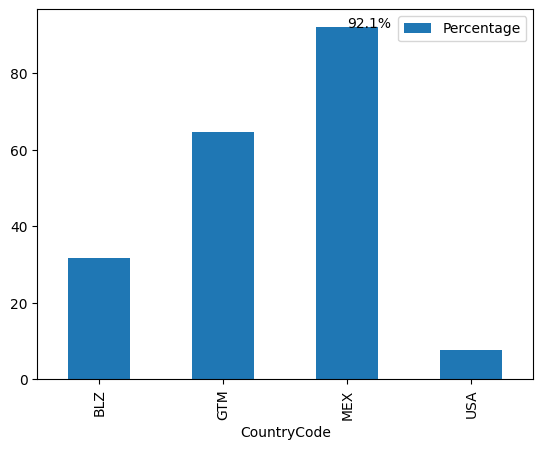

In [94]:
## crear grafica con y texto con pandas

mexico_borders.plot(kind='bar')
plt.text(2,92.1,'92.1%')

Text(2, 92.1, '92.1%')

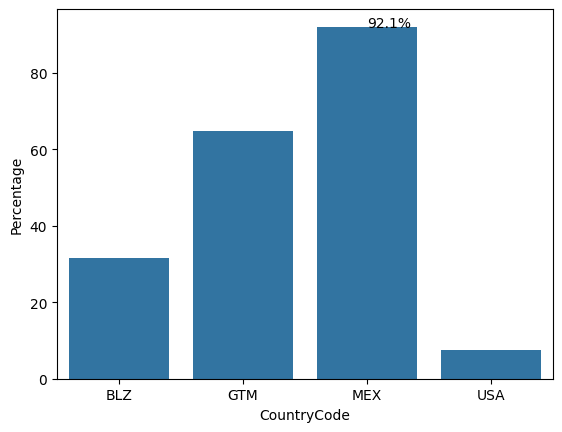

In [95]:
## crear grafica con y texto con seaborn

sns.barplot(x=mexico_borders.index,y='Percentage',data=mexico_borders)
plt.text(2,92.1,'92.1%')

Text(MEX, 92.1, '92.1%')

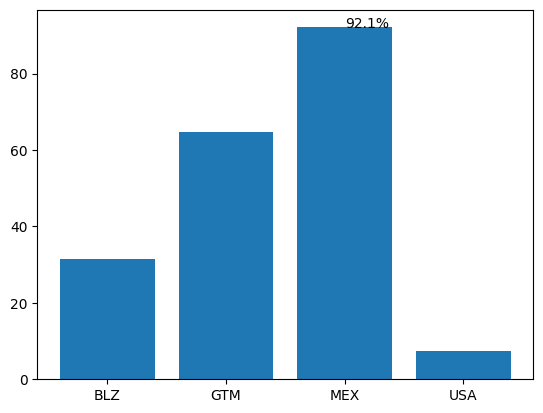

In [96]:
## buscar en valor por el indice en el dataframe

value = mexico_borders.loc['MEX','Percentage']
plt.bar( mexico_borders.index,'Percentage',data=mexico_borders)
plt.text('MEX',value,str(value)+'%')


Text(MEX, 92.1, '92.1%')

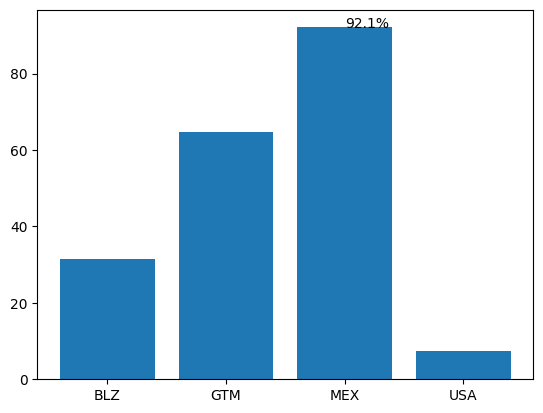

In [97]:
## buscar en valor por condicional en el dataframe

value = mexico_borders.loc[mexico_borders['Percentage']==mexico_borders['Percentage'].max(),'Percentage']
#value = value.values[0]
value = value.tolist()[0]
plt.bar( mexico_borders.index,'Percentage',data=mexico_borders)
plt.text('MEX',value,str(value)+'%')


Text(330, 420, '92.1%')

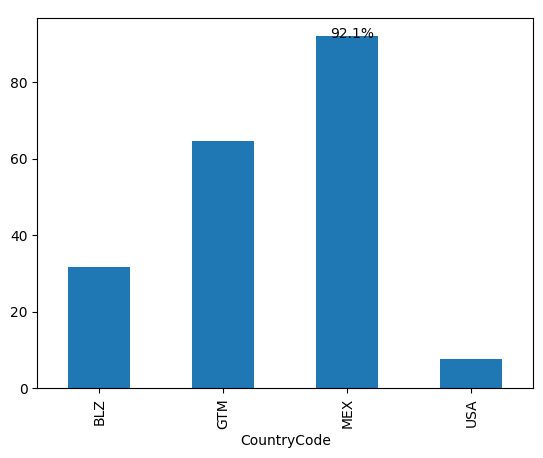

In [98]:
## usando transform para seleccionar pixel en especifico

mexico_borders['Percentage'].plot.bar()
plt.text(330,420,'92.1%',transform=None)

Text(0.58, 0.95, '92.1%')

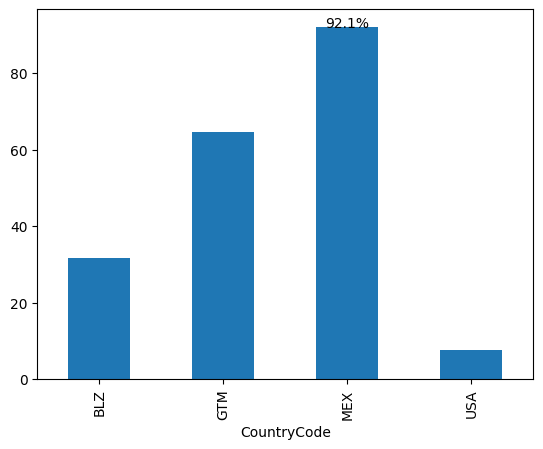

In [99]:
## usando transform en relación a los ejes en especifico

ax = mexico_borders['Percentage'].plot.bar()
plt.text(0.58,0.95,'92.1%',transform=ax.transAxes)

Text(0.58, 0.85, '92.1%')

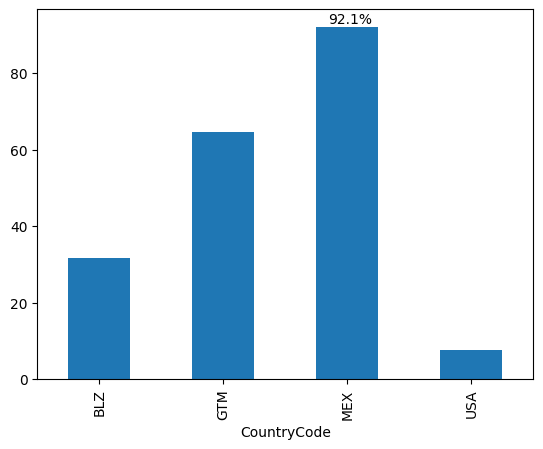

In [100]:
## usando transform en relación a la figura

fig,ax = plt.subplots()
mexico_borders['Percentage'].plot.bar(ax=ax)
plt.text(0.58,0.85,'92.1%',transform=fig.transFigure)

Text(2, 92.1, '92.1%')

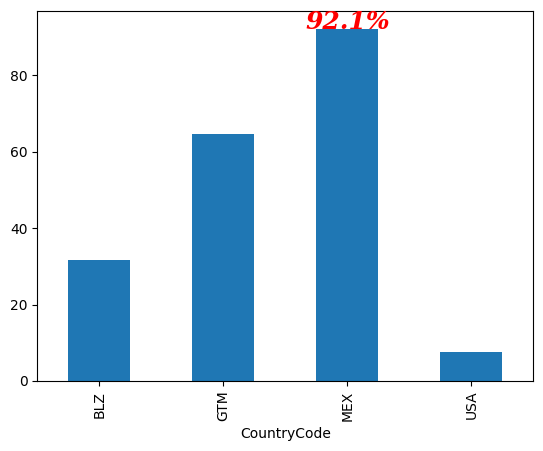

In [101]:
## propiedades modificables

mexico_borders['Percentage'].plot.bar()
plt.text(2,92.1,'92.1%',family='serif',fontsize=18,fontweight='bold',style='italic',color='red',horizontalalignment='center')

Text(2, 92.1, '92.1%')

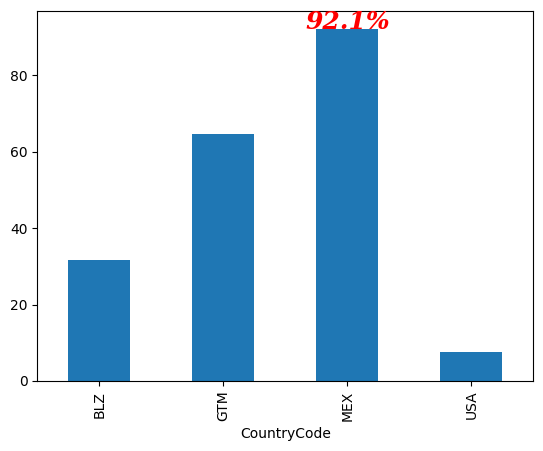

In [102]:
## determinando las propiedades en un diccionario

props_font = {'family': 'serif','size': 18,'weight': 'bold','style': 'italic','color': 'red','horizontalalignment': 'center'}
mexico_borders['Percentage'].plot.bar()
plt.text(2,92.1,'92.1%',fontdict=props_font)


Text(2, 92.1, '92.1%')

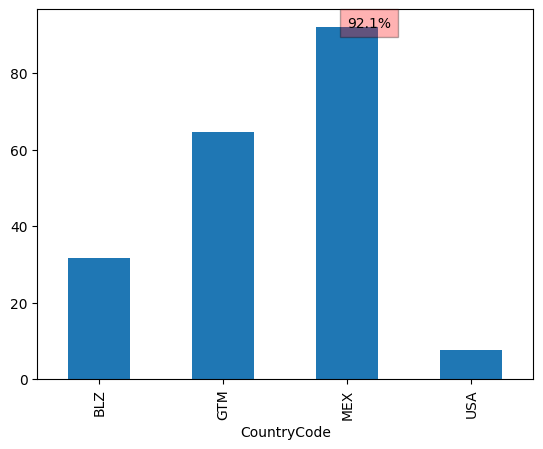

In [103]:
## determinando propiedades a traves del objeto bbox

mexico_borders['Percentage'].plot.bar()
plt.text(2,92.1,'92.1%',bbox=dict(facecolor='red',alpha=0.3,pad=5))


Text(2, 92.1, '92.1%')

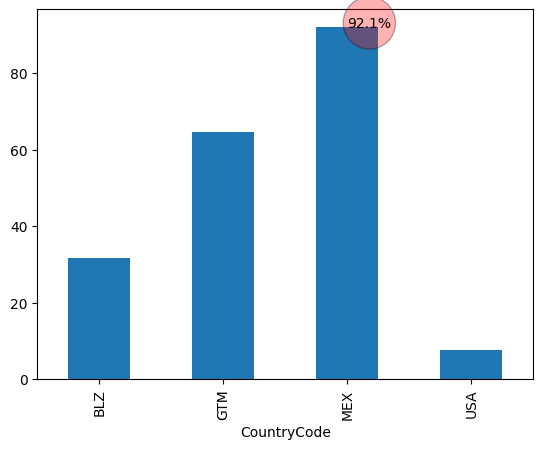

In [104]:
## usando bbox y un diccionario para las propiedades

props_bbox = {'boxstyle': 'circle','facecolor': 'red','alpha': 0.3}
mexico_borders['Percentage'].plot.bar()
plt.text(2,92.1,'92.1%',bbox=props_bbox)

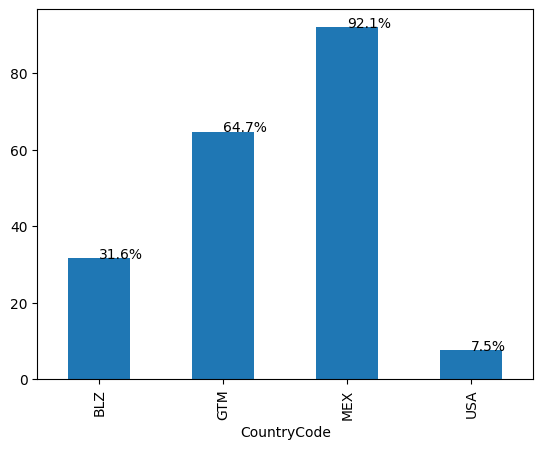

In [105]:
## para incluir los varoles de todos los paises tenemos que iterar


mexico_borders['Percentage'].plot.bar()

for i in range(mexico_borders.shape[0]):
  plt.text(i,mexico_borders.iloc[i,0],str(mexico_borders.iloc[i,0])+'%')





Text(-0.4, 66.05, '66.05%')

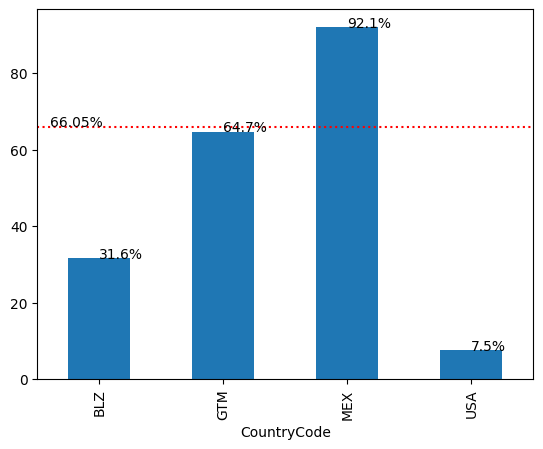

In [106]:
## para insertar una line horizonta o vertical con un atributo informativo en la grafica

spanish_mean =(languages.loc[languages['Language']=='Spanish','Percentage']).mean()

mexico_borders['Percentage'].plot.bar()

for i in range(mexico_borders.shape[0]):
  plt.text(i,mexico_borders.iloc[i,0],str(mexico_borders.iloc[i,0])+'%')

plt.axhline(y=spanish_mean,color='red',linestyle=':')
plt.text(-0.4,spanish_mean,str(f'{spanish_mean:.2f}')+'%')

Text(-0.4, 66.05, '$\\frac{\\sum_{i=1}^\\# percentage_i}{\\#}=$66.05%')

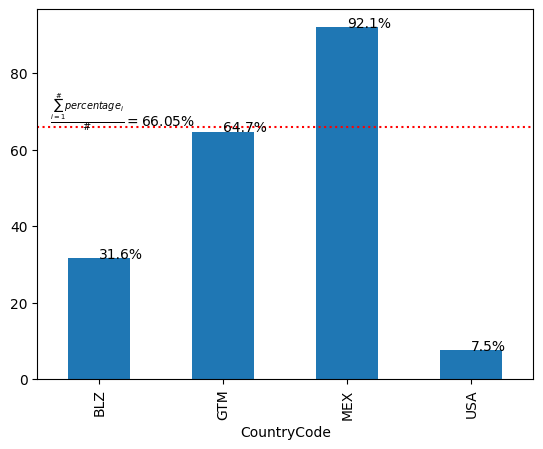

In [107]:
## incluir funciones matematicas dentro del texto

spanish_mean =(languages.loc[languages['Language']=='Spanish','Percentage']).mean()

mexico_borders['Percentage'].plot.bar()

for i in range(mexico_borders.shape[0]):
  plt.text(i,mexico_borders.iloc[i,0],str(mexico_borders.iloc[i,0])+'%')

plt.axhline(y=spanish_mean,color='red',linestyle=':')
plt.text(-0.4,spanish_mean,r'$\frac{\sum_{i=1}^\# percentage_i}{\#}=$'
+str(f'{spanish_mean:.2f}')+'%')

In [108]:
## anotaciones creamos un dataframe de mexico con uss lenguas

mexico = languages.loc[languages['CountryCode']=='MEX',['Language','Percentage']]
mexico.set_index('Language',inplace=True)
mexico.loc['Others']=[100 - mexico['Percentage'].sum()]
mexico

,Percentage
Language,
Mixtec,0.6
Náhuatl,1.8
Otomí,0.4
Spanish,92.1
Yucatec,1.1
Zapotec,0.6
Others,3.4


<Axes: ylabel='Percentage'>

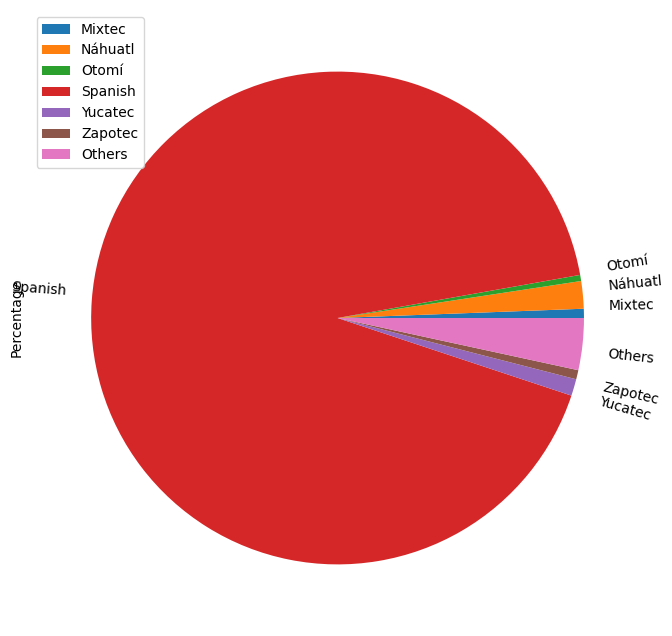

In [109]:
## graficar pie con matplotlib

mexico.plot.pie(y='Percentage',labels=mexico.index,rotatelabels=True,figsize=(8,8))


Text(1, 1, '(0,0)')

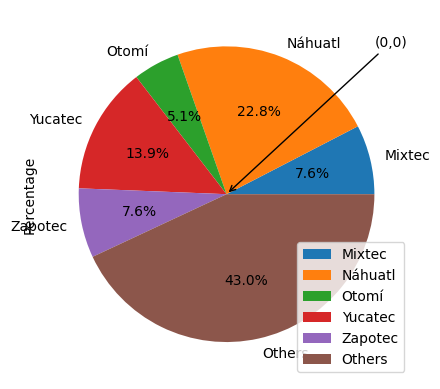

In [110]:
## para obtener mejor detalle dejamos unicamente las lenguas no oficiales

mexico_unofficial = mexico.drop(mexico.loc[mexico.index=='Spanish'].index)
mexico_unofficial.plot.pie(y='Percentage',labels=mexico_unofficial.index,autopct='%1.1f%%')

plt.annotate('(0,0)',xy=(0,0),xytext=(1,1),arrowprops=dict(arrowstyle='->'))

Text(1, 1, '(0,0)')

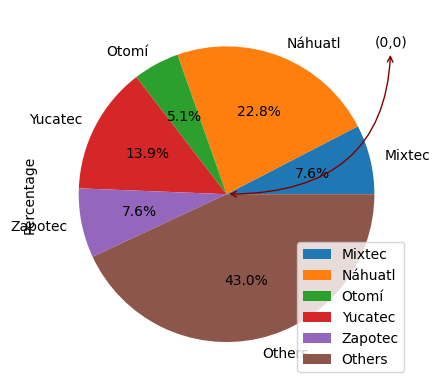

In [111]:
## modificando la linea y el estilo

mexico_unofficial.plot.pie(y='Percentage',labels=mexico_unofficial.index,autopct='%1.1f%%')
plt.annotate('(0,0)',xy=(0,0),xytext=(1,1),arrowprops=dict(arrowstyle='<->', connectionstyle='angle3',color='maroon'))


Text(1, 0.6, '1.8% including Spanish')

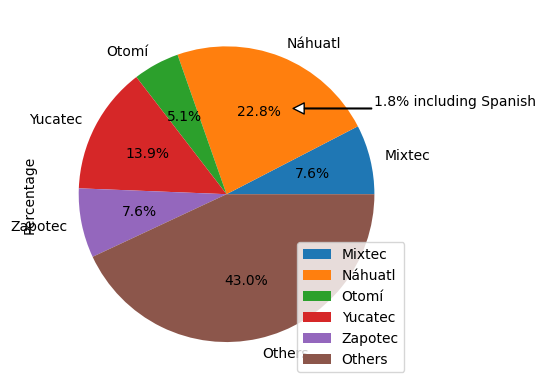

In [112]:
## con un diccionario

props_arrow = {'facecolor':'white','width':0.5,'headwidth':8,'headlength':8}

mexico_unofficial.plot.pie(y='Percentage',labels=mexico_unofficial.index,autopct='%1.1f%%')
plt.annotate('1.8% including Spanish', xy=(0.45,0.58),xytext=(1,0.6),arrowprops=props_arrow )

In [113]:
## trazado de tablas

some_languages = languages.loc[languages['Language'].isin(['Spanish','English','Chinese','French','Russian','Italian','German'])]
some_languages.shape
some_languages.head()

,CountryCode,Language,IsOfficial,Percentage
1,ABW,English,F,9.5
3,ABW,Spanish,F,7.4
18,AIA,English,T,0.0
23,AND,French,F,6.2
25,AND,Spanish,F,44.6


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'English'),
  Text(1, 0, 'Spanish'),
  Text(2, 0, 'French'),
  Text(3, 0, 'Italian'),
  Text(4, 0, 'German'),
  Text(5, 0, 'Russian'),
  Text(6, 0, 'Chinese')])

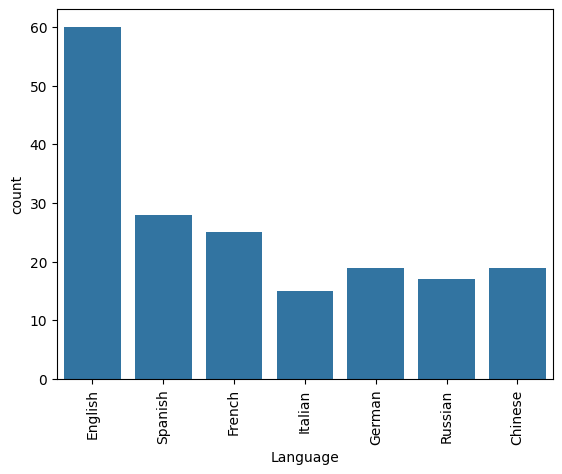

In [114]:
## graficamos frecuencia con seaborn

sns.countplot(x='Language',data=some_languages)
plt.xticks(rotation=90)


In [115]:
## tabla con conteo de valoires por idioma con value_counts()

counts =pd.DataFrame(some_languages['Language'].value_counts())
counts_T = counts.T
counts_T.head()

Language,English,Spanish,French,German,Chinese,Russian,Italian
count,60,28,25,19,19,17,15


In [116]:
## tabla de conteo de valores por idiima con groupby()

counts = some_languages.groupby(['Language']).count()[['CountryCode']]
counts = counts.rename(columns={'CountryCode':'count'})
counts_T = counts.T
counts_T.head()

Language,Chinese,English,French,German,Italian,Russian,Spanish
count,19,60,25,19,15,17,28


([], [])

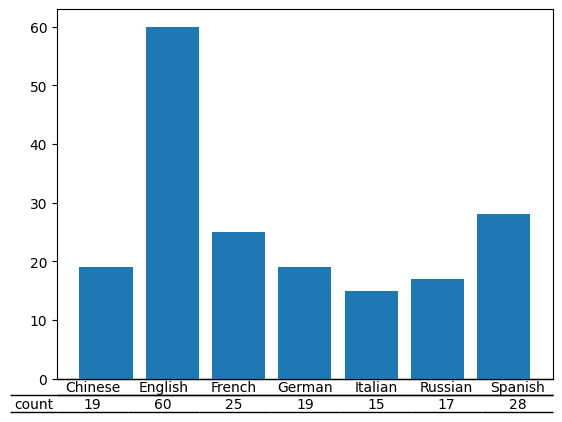

In [127]:
## grafica con tabla con matplotlib

plt.bar(counts.index,'count',data=counts)
counts_T = counts.T
plt.table(cellText=counts_T.values,colLabels=counts_T.columns,rowLabels=counts_T.index,cellLoc='center',edges='horizontal')
plt.xticks([])



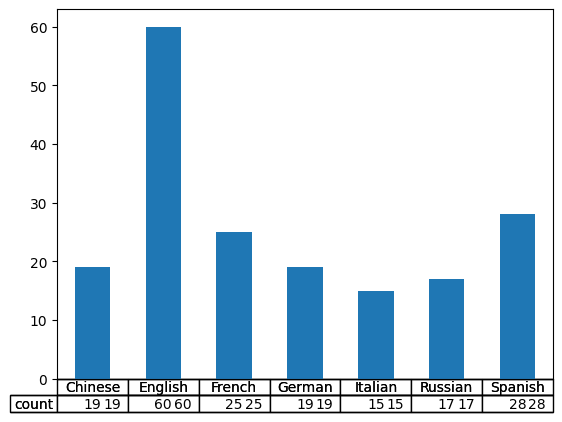

In [125]:
## grafica con tabla con pandas

counts.plot(kind='bar',table=True,xticks=[],xlabel='',legend='')

Text(0.5, 0, '')

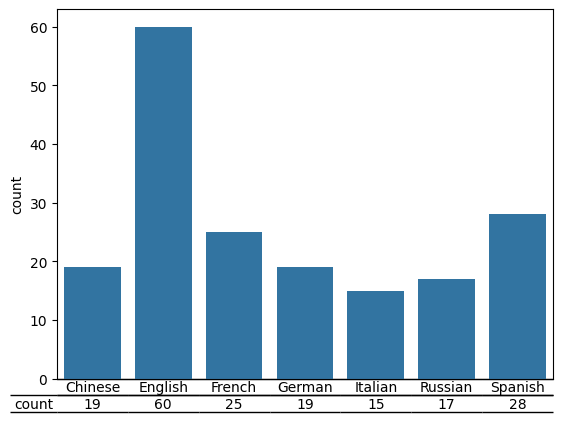

In [129]:
## grafica con tabla con seaborn

sns.barplot(x=counts.index,y='count',data=counts)
counts_T = counts.T
##plt.table(cellText=counts_T.values,colLabels=counts_T.columns)
plt.table(cellText=counts_T.values,colLabels=counts_T.columns,rowLabels=counts_T.index,cellLoc='center',edges='horizontal')
plt.xticks([])
plt.xlabel('')



([], [])

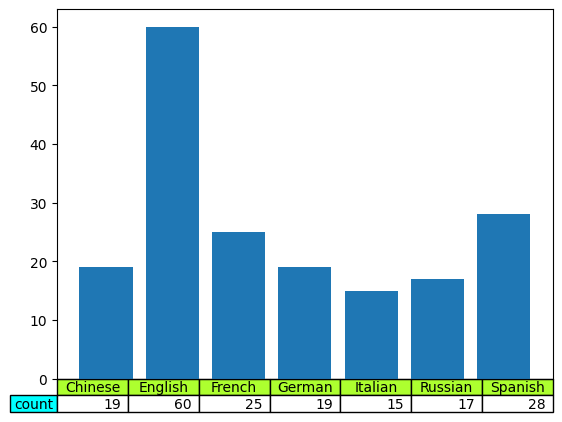

In [130]:
plt.bar(counts.index,'count',data=counts)
counts_T = counts.T
plt.table(cellText=counts_T.values,colLabels=counts_T.columns,rowLabels=counts_T.index,rowColours=['cyan'],colColours=['greenyellow']*7)
plt.xticks([])

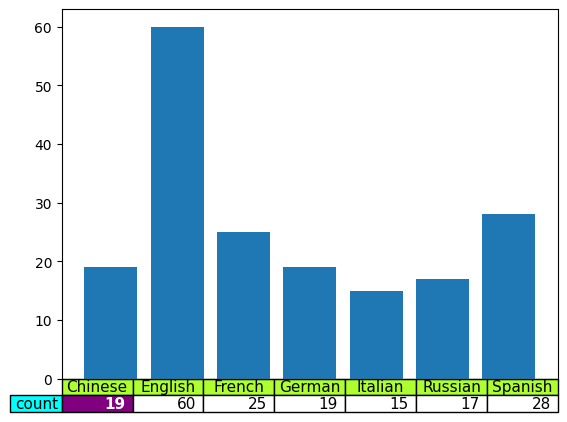

In [134]:
plt.bar(counts.index,'count',data=counts)
counts_T = counts.T
t = plt.table(cellText=counts_T.values,colLabels=counts_T.columns,rowLabels=counts_T.index,rowColours=['cyan'],colColours=['greenyellow']*7)
plt.xticks([])
t.auto_set_font_size(False)
t.set_fontsize(11)
cell = t[1,0]
cell.set_text_props(weight='bold',color='white')
cell.set_facecolor('purple')


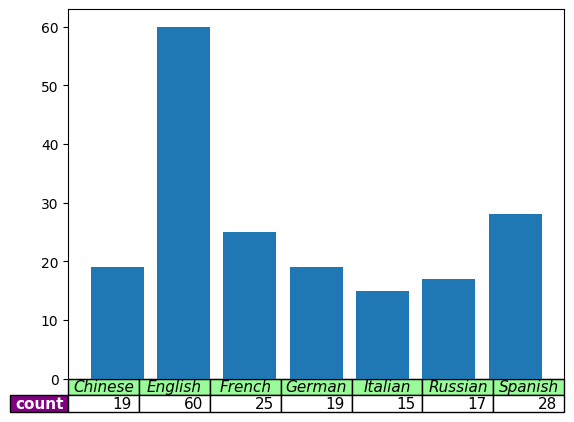

In [135]:
plt.bar(counts.index,'count',data=counts)
counts_T = counts.T
t = plt.table(cellText=counts_T.values,colLabels=counts_T.columns,rowLabels=counts_T.index,rowColours=['cyan'],colColours=['greenyellow']*7)
plt.xticks([])
t.auto_set_font_size(False)
t.set_fontsize(11)

for (row,col), cell in t.get_celld().items():
  if (row == 0):
    cell.set_text_props(weight='light',style='italic')
    cell.set_facecolor('palegreen')
else:
  cell.set_text_props(weight='bold',color='white')
  cell.set_facecolor('purple')

In [136]:
## separa df por idioma oficial o no oficial

counts_isofficial = some_languages.groupby(['IsOfficial','Language']).count()[['CountryCode']]
counts_isofficial.columns=['Count']
counts_isofficial.head()


Count
IsOfficial Language       
F          Chinese      17
           English      16
           French        7
           German       13
           Italian      11

In [139]:
## ordenar el dataframe
counts_isofficial = counts_isofficial.iloc[: 7,:].merge(counts_isofficial.iloc[7:,:],on='Language',suffixes=('_F', '_T'))[['Count_F','Count_T']]
counts_isofficial.columns =[ 'NonOfficial','Official']
counts_isofficial.head()

,NonOfficial,Official
Language,,
Chinese,17,2
English,16,44
French,7,18
German,13,6
Italian,11,4


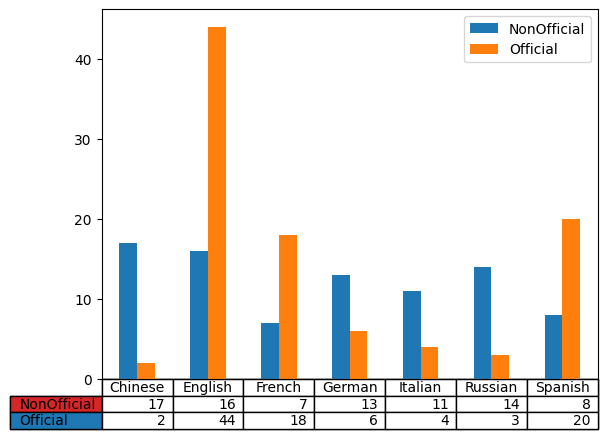

In [142]:
##graficar

counts_isofficial.plot.bar(table=True,xticks=[],xlabel='')

counts_isofficial_T = counts_isofficial.T
plt.table(cellText=counts_isofficial_T.values,colLabels=counts_isofficial_T.columns,rowLabels=counts_isofficial_T.index,rowColours=['tab:red','tab:blue'])

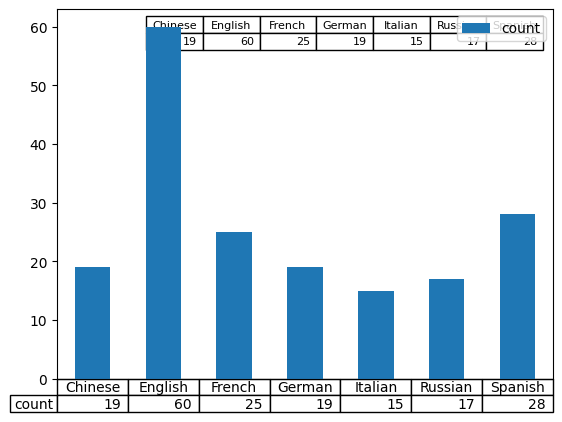

In [145]:
## cambiar la posición
counts.plot.bar(table=True,xticks=[],xlabel='')

t = plt.table(cellText=counts_T.values,colLabels=counts_T.columns,loc='upper right')
t.scale(0.8,1)


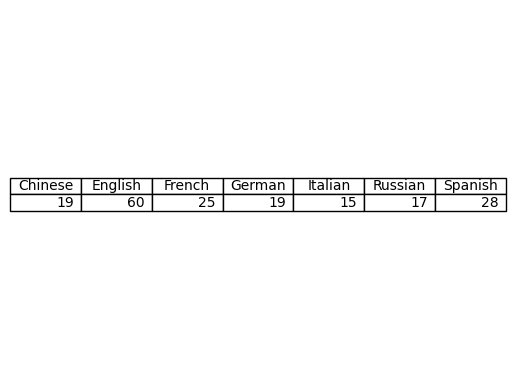

In [146]:
## crear la tabla sin grafica

fig,ax = plt.subplots(1,1)
ax.axis('off')
ax.table(cellText=counts_T.values,colLabels=counts_T.columns,loc='center')